In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [3]:
data_path = 'data/'
df_host = pd.read_parquet(data_path + 'airbnb_madrid_host.parquet')
df_propiedad = pd.read_parquet(data_path + 'airbnb_madrid_property.parquet')
df_localizacion = pd.read_parquet(data_path + 'airbnb_madrid_location.parquet')
df_reviews = pd.read_parquet(data_path + 'airbnb_madrid_reviews.parquet')
df_condiciones = pd.read_parquet(data_path + 'airbnb_madrid_conditions.parquet')

In [38]:
df = df_host.merge(df_propiedad, how='inner', on='id', validate=None)\
    .merge(df_localizacion, how='inner', on='id', validate=None)\
    .merge(df_reviews, how='inner', on='id', validate=None)\
    .merge(df_condiciones, how='inner', on='id', validate=None)
df

id  host_response_time  host_response_rate  host_is_superhost  \
0          0      within_an_hour               100.0                  1   
1          1                None                 NaN                  0   
2          2      within_an_hour               100.0                  0   
3          3  within_a_few_hours               100.0                  0   
4          4      within_an_hour               100.0                  1   
...      ...                 ...                 ...                ...   
21015  21360                None                 NaN                  0   
21016  21361      within_an_hour               100.0                  0   
21017  21363                None                 NaN                  0   
21018  21364      within_an_hour               100.0                  0   
21019  21365                None                 NaN                  0   

       host_has_profile_pic  host_identity_verified  host_verifications_email  \
0                         1                       0                         1   
1                         1                       1                         1   
2                         1                       0                         1   
3                         1                       1                         1   
4                         1                       0                         1   
...                     ...                     ...                       ...   
21015                     1                       0                         1   
21016                     1                       1                         1   
21017                     1                       0                         1   
21018                     1                       0                         1   
21019                     1                       0                         0   

       host_verifications_phone  host_verifications_reviews  \
0                             1                           1   
1                             1                           1   
2                             1                           1   
3                             1                           1   
4                             1                           1   
...                         ...                         ...   
21015                         1                           0   
21016                         1                           1   
21017                         1                           0   
21018                         1                           1   
21019                         1                           0   

       host_verifications_facebook  ...  days_since_first_review  \
0                                0  ...                     3589   
1                                0  ...                     1918   
2                                0  ...                       -1   
3                                1  ...                     1868   
4                                1  ...                     3144   
...                            ...  ...                      ...   
21015                            0  ...                       -1   
21016                            1  ...                       -1   
21017                            0  ...                       -1   
21018                            0  ...                       -1   
21019                            0  ...                       -1   

       number_of_reviews_en  number_of_reviews_es number_of_reviews_otros  \
0                      65.0                   5.0                     3.0   
1                      17.0                  12.0                     4.0   
2                       NaN                   NaN                     NaN   
3                       6.0                   2.0                     1.0   
4                      37.0                  23.0                     7.0   
...                     ...                   ...                     ...   
21015                  

In [5]:
# TO-DO: Borrar NaN

In [6]:
df.columns

Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'neighbourhood', 'neighbourhood_group', 'latitude',
       'longitude', 'dist_km_sol', 'dist_km_airport', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'days_since_l

In [7]:
pd.set_option("display.max_rows", 20)
df.require_guest_profile_picture.describe()

count    21020.000000
mean         0.009420
std          0.096599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: require_guest_profile_picture, dtype: float64

In [8]:
for col in df.columns:
    if set(df[col].dropna().unique()) <= {0, 1}:
        df[col] = df[col].astype('category')


In [9]:
df.select_dtypes("category").apply(lambda x: x.value_counts())


host_is_superhost  host_has_profile_pic  host_identity_verified  \
0              16746                    75                   14729   
1               4274                 20945                    6291   

   host_verifications_email  host_verifications_phone  \
0                      1345                       120   
1                     19675                     20900   

   host_verifications_reviews  host_verifications_facebook  \
0                        8538                        18058   
1                       12482                         2962   

   host_verifications_government_id  amenities_wifi_internet  amenities_tv  \
0                              6512                      929          4400   
1                             14508                    20091         16620   

   amenities_air_conditioning  amenities_heating  amenities_kitchen  \
0                        7771               2393               2031   
1                       13249              18627              18989   

   require_guest_profile_picture  require_guest_phone_verification  
0                          20822                             20707  
1                            198                               313

In [10]:
# df_dummies = pd.get_dummies(df, drop_first=True)


# corr = df_dummies.corr(method='spearman')[["price"]].sort_values(by="price", ascending=False)
# corr

## HIPOTESIS
HACER ANALISIS DE LA LOALIZACION (MAPITAAAAA DE PRECIOS POR LATITUD Y LONGITUD Y QUE SEA INTERACTIVO)
1. Instalando amenities como AC, televesión o calefacción, etc sube el precio
2. Llevando a cabo reformas donde se cambie el numero de habitaciones sube el precio
3. Con un número de noches minimas pequeño sube el precio ya que el cliente no se ve obligado a pagar tanto
4. Con una política de cancelación laxa el precio subirá (seguramente pase lo contrario y salga un razonamiento interesante y acciones futuras)
5. Instalar una cocina sube el precio / si cambio la cocina por habitacion sube el precio -> PREGUNTAR
6. Si aumento el servicio de limpieza la reviews de cleanliness potencialmente subiran por ende el precio subira -> PREGUNTAR
7. Si es mejor poner camas, ¿que tipo de camas?
8. OPCIONAL -> si modificas tu perfil de host el precio sube

In [11]:
# TODO -> filtrar por tipo de propiedad (apartamento), habitaciones (1-3) baños (1-2)
df = df.query("property_type == 'apartment' and bedrooms <= 3 and bedrooms >=1 and bathrooms <= 2 and minimum_nights <= 7" )
df.shape

(14308, 52)

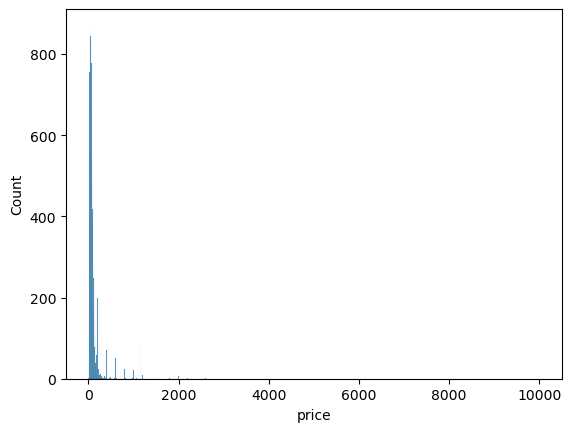

In [12]:
sns.histplot(
    data= df,
    x='price'
)

plt.show()

In [13]:
fig= px.box(
    data_frame=df,
    y='price'
)
fig.update_yaxes(range=[0, 500])

In [14]:

# Calcular cuartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites de valores válidos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar DataFrame eliminando outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Verificar
print(df.shape)


(13014, 52)


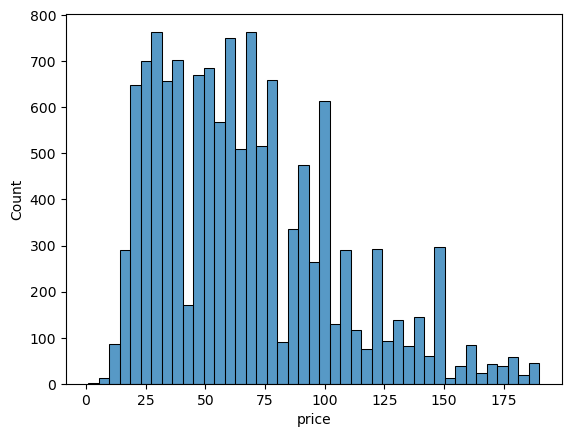

In [15]:
# EDITAR EL GRAFICO A MI GUSTO  
sns.histplot(
    data= df,
    x='price'
)

plt.show()

In [16]:
def px_box_with_pvalue(df, cat_var, num_var, title=None, color_palette=None):
    import plotly.express as px
    import statsmodels.stats.weightstats as ws
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    data = df[[cat_var, num_var]].dropna()
    grupos = data.groupby(cat_var)[num_var]

    if len(grupos) == 2:
        g1, g2 = [g for _, g in grupos]
        t_stat, p_value, _ = ws.ttest_ind(g1, g2, usevar="unequal")
        test_name = "t-test"
    else:
        modelo = ols(f"{num_var} ~ C({cat_var})", data=data).fit()
        anova = sm.stats.anova_lm(modelo, typ=2)
        p_value = anova["PR(>F)"][0]
        test_name = "ANOVA"

    fig = px.box(
        data, 
        x=cat_var, 
        y=num_var, 
        color=cat_var,
        color_discrete_sequence=color_palette,
        title=title or f"{num_var} por {cat_var}",
        points="outliers"
    )
    
    fig.add_annotation(
        x=0.5, y=data[num_var].max() * 0.95,
        text=f"{test_name} p-value = {p_value:.4f}",
        showarrow=False, font=dict(size=12, color="darkred"),
        bgcolor="rgba(255,255,255,0.8)", bordercolor="darkred", borderwidth=1
    )
    
    # Fondo blanco y cuadrículas suaves
    fig.update_layout(
        plot_bgcolor="white",
        paper_bgcolor="white"
    )
    fig.update_xaxes(showgrid=True, gridcolor="lightgray")
    fig.update_yaxes(showgrid=True, gridcolor="lightgray")
    
    return fig




### HIPOTESIS 1

Instalando amenities como AC, televesión o calefacción, etc sube el precio

Analizando los datos de amenities se puede oservar que auqellas como que la vivienda incluya TV, aire acondicionado, calefaccion o cocina tienen un precio medio mayor que aquellas viviendas que no las incluyen. Sin emargo, la instalacion de Wifi no es estadisticamente significativa en el precio, por lo que la isntyalacion de wifi no deberia de ser prioritaria a la hora de aumentar el precio de un alojamiento.

In [17]:
paleta= ["#ADDCA3", '#6B7F5C']
px_box_with_pvalue(df, 'amenities_wifi_internet', 'price', color_palette=px.colors.qualitative.Pastel)

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [18]:

px_box_with_pvalue(df, 'amenities_tv', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:
px_box_with_pvalue(df, 'amenities_air_conditioning', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [20]:
px_box_with_pvalue(df, 'amenities_heating', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [21]:
px_box_with_pvalue(df, 'amenities_kitchen', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### HIPOTESIS 2

Llevando a cabo reformas donde se cambie el numero de habitaciones sube el precio

Si la vivienda constya de una sola habitación la adición de una segunda incluso una tercera habitación aumenta el precio medio del alojamiento. Sin embargo, si la vivienda ya cuenta con 2 habitaciones la adición de una tercera no aumenta el precio medio del alojamiento. Por lo tanto, se recomienda que si la vivienda cuenta con una sola habitación se añada una segunda para aumentar el precio medio del alojamiento.

In [22]:
# Transformar el dato bedrooms a categorica
df['bedrooms'] = df['bedrooms'].astype('category')

In [23]:
px_box_with_pvalue(df, 'bedrooms', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### HIPOTESIS 3

Con un número de noches minimas pequeño sube el precio ya que el cliente no se ve obligado a pagar tanto

Un número de noches nimina entre 1 y 2 tiene un precio medio de alojamiento más bajo que si llegase a aumentar a 3/4 noches. A partir de 4 el precio baja significativamente. Por lo tanto, se recomienda que el número de noches mínimas sea de 3 o 4 para aumentar el precio medio del alojamiento.

In [24]:
# Transformar el dato minimum_nights a categorica
df['minimum_nights'] = df['minimum_nights'].astype('category')
px_box_with_pvalue(df, 'minimum_nights', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### HIPOTESIS 4

Con una política de cancelación laxa el precio subirá (seguramente pase lo contrario y salga un razonamiento interesante y acciones futuras)

Destaca que aquellas viviendas que tengan una política de cancelación estricta tienen un precio medio mayor que aquellas con políticas de cancelación moderada o flexible. Por lo tanto, se recomienda que la política de cancelación sea estricta para aumentar el precio medio del alojamiento. 

Aun así, se puede deber a que aquellas viviendas con la cancelacion super estricta pueden tener mejores caractericas y por lo tanto un precio mayor, por lo que se le impone una cancelacion estricta para evitar cancelaciones de clientes que no valoran el alojamiento.

In [25]:
df['cancellation_policy'].unique()

array(['flexible', 'strict_14_with_grace_period', 'moderate',
       'super_strict_30', 'super_strict_60'], dtype=object)

In [26]:
# Transformar el dato cancellation_policy a categorica
df['cancellation_policy'] = df['cancellation_policy'].astype('category')
px_box_with_pvalue(df, 'cancellation_policy', 'price')

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# HIPOTESIS 6
Si aumento el servicio de limpieza las reseñas de limpieza potencialmente subirán por ende el precio aumentará.



In [27]:
df['review_scores_cleanliness'].unique()

array([10.,  9., nan,  8.,  6.,  7.,  4.,  2.,  5.,  3.])

In [28]:
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].astype('category')

In [29]:
paleta=[ "#e0e7b6", "#c9d587", "#c7e9c0", "#a1d99b","#74c476", "#41ab5d","#238b45", "#006d2c","#00441b","#01240f"]
px_box_with_pvalue(df, 'review_scores_cleanliness','price', color_palette=paleta )

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lucia\AppData\Local\Temp\ipykernel_23288\3399358944.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [30]:
paleta=[ "#e0e7b6", "#c9d587", "#c7e9c0", "#a1d99b","#74c476", "#41ab5d","#238b45", "#006d2c","#00441b","#01240f"]
fig= px.box(
    df, 
    x='review_scores_cleanliness', 
    y='price',
    color='review_scores_cleanliness',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
        plot_bgcolor="white",
        paper_bgcolor="white"
    )
fig.update_xaxes(showgrid=True, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridcolor="lightgray")

In [ ]:
fig= px.histogram(
    df, 
    x='review_scores_cleanliness',
    color='review_scores_cleanliness',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Número de viviendas por calificación de limpieza'
)

fig.update_layout(
        plot_bgcolor="white",
        paper_bgcolor="white"
    )
fig.update_xaxes(showgrid=True, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridcolor="lightgray")

# Mapa interactivo de precios en Madrid
import plotly.graph_objects as go
import plotly.express as px

# Preparar datos para el mapa
map_data = df[['latitude', 'longitude', 'price', 'bedrooms', 'property_type', 'neighbourhood']].dropna()

# Crear mapa con scatter_mapbox
fig_map = px.scatter_mapbox(
    map_data,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    hover_name='neighbourhood',
    hover_data={
        'price': '€:.0f',
        'bedrooms': True,
        'property_type': True,
        'latitude': ':.4f',
        'longitude': ':.4f'
    },
    color_continuous_scale='Viridis',
    size_max=20,
    zoom=10,
    center=dict(lat=40.4168, lon=-3.7038),  # Centro de Madrid
    title='Mapa de Precios de AirBnB en Madrid',
    labels={'price': 'Precio (€)'},
    template='plotly_light'
)

# Actualizar layout para mejorar visualización
fig_map.update_layout(
    mapbox_style='open-street-map',
    height=700,
    margin={"r":0,"t":30,"l":0,"b":0},
    hovermode='closest',
    font=dict(size=10),
    coloraxis_colorbar=dict(
        title="Precio (€)",
        thickness=15,
        len=0.7
    )
)

fig_map.show()

In [32]:
# Mapa interactivo de precios en Madrid
import plotly.graph_objects as go
import plotly.express as px

# Preparar datos para el mapa
map_data = df[['latitude', 'longitude', 'price', 'bedrooms', 'property_type', 'neighbourhood']].dropna()

# Crear mapa con scatter_mapbox
fig_map = px.scatter_mapbox(
    map_data,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    hover_name='neighbourhood',
    hover_data={
        'price': '€:.0f',
        'bedrooms': True,
        'property_type': True,
        'latitude': ':.4f',
        'longitude': ':.4f'
    },
    color_continuous_scale='Viridis',
    size_max=20,
    zoom=10,
    center=dict(lat=40.4168, lon=-3.7038),  # Centro de Madrid
    title='Mapa de Precios de AirBnB en Madrid',
    labels={'price': 'Precio (€)'}
)

# Actualizar layout para mejorar visualización
fig_map.update_layout(
    mapbox_style='open-street-map',
    height=700,
    margin={"r":0,"t":30,"l":0,"b":0},
    hovermode='closest',
    font=dict(size=10),
    coloraxis_colorbar=dict(
        title="Precio (€)",
        thickness=15,
        len=0.7
    )
)

fig_map.show()

In [33]:
# Mapa con diferentes estilos visuales
# 1. Mapa de densidad (Heatmap)
fig_heatmap = go.Figure()

fig_heatmap.add_trace(go.Densitymapbox(
    lat=map_data['latitude'],
    lon=map_data['longitude'],
    z=map_data['price'],
    radius=30,
    colorscale='Viridis',
    showscale=True,
    colorbar=dict(title="Precio (€)"),
    hovertemplate='<b>%{text}</b><br>Precio: €%{z:.0f}<extra></extra>',
    text=map_data['neighbourhood'],
))

fig_heatmap.update_layout(
    mapbox_style='open-street-map',
    title='Mapa de Densidad de Precios en Madrid',
    height=700,
    margin={"r":0,"t":40,"l":0,"b":0},
    mapbox=dict(
        center=dict(lat=40.4168, lon=-3.7038),
        zoom=10
    )
)

fig_heatmap.show()


In [34]:
# Estadísticas geográficas por barrio
barrio_stats = df.groupby('neighbourhood').agg({
    'price': ['mean', 'median', 'count'],
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

barrio_stats.columns = ['neighbourhood', 'precio_medio', 'precio_mediano', 'cantidad', 'latitude', 'longitude']

# Mapa de burbujas por barrio (agregado)
fig_barrios = px.scatter_mapbox(
    barrio_stats,
    lat='latitude',
    lon='longitude',
    size='cantidad',
    color='precio_medio',
    hover_name='neighbourhood',
    hover_data={
        'precio_medio': '€:.0f',
        'precio_mediano': '€:.0f',
        'cantidad': True,
        'latitude': ':.4f',
        'longitude': ':.4f'
    },
    color_continuous_scale='RdYlGn_r',
    size_max=50,
    zoom=9.5,
    center=dict(lat=40.4168, lon=-3.7038),
    title='Precio Medio por Barrio de Madrid (Tamaño = Cantidad de Propiedades)',
    labels={'precio_medio': 'Precio Medio (€)', 'cantidad': 'Propiedades'}
)

fig_barrios.update_layout(
    mapbox_style='open-street-map',
    height=700,
    margin={"r":0,"t":40,"l":0,"b":0},
    hovermode='closest'
)

fig_barrios.show()

print("\n📍 TOP 10 BARRIOS POR PRECIO MEDIO:")
top_barrios = barrio_stats.nlargest(10, 'precio_medio')[['neighbourhood', 'precio_medio', 'cantidad']]
for idx, row in top_barrios.iterrows():
    print(f"  {row['neighbourhood']}: €{row['precio_medio']:.0f} ({int(row['cantidad'])} propiedades)")



📍 TOP 10 BARRIOS POR PRECIO MEDIO:
  Recoletos: €100 (69 propiedades)
  Hispanoamérica: €99 (32 propiedades)
  El Tréntaiseis: €94 (6 propiedades)
  El Viso: €92 (18 propiedades)
  Castellana: €90 (38 propiedades)
  Almagro: €86 (48 propiedades)
  Sol: €86 (374 propiedades)
  Nueva España: €84 (12 propiedades)
  Goya: €84 (102 propiedades)
  Argüelles: €83 (126 propiedades)
